# 1. Introduction

## 1.1 Dataset Overview
This notebook focuses on exploring and preprocessing a dataset containing information about sales leads for an educational company. The dataset includes various attributes of potential customers (prospects) who have shown interest in the company's courses. These attributes range from basic information like lead origin and source to more detailed information about the prospect's interactions with the company's website and marketing efforts.

Key features of the dataset include:

- Prospect identification (Prospect ID, Lead Number)
- Lead acquisition information (Lead Origin, Lead Source)
- Prospect preferences (Do Not Email, Do Not Call)
- Engagement metrics (Total Visits, Total Time Spent on Website, Page Views Per Visit)
- Demographic information (Country, City, Specialization, Current Occupation)
- Prospect interests and behaviors (Last Activity, What matters most in choosing this course)
- Marketing touchpoints (Search, Magazine, Newspaper Article, etc.)
- Lead quality assessments and profile scores

The target variable for our analysis is 'Converted', which indicates whether a lead has been successfully converted into a customer.

## 1.2 Objectives
The main objectives of this exploratory data analysis (EDA) and preprocessing notebook are:

- Gain a comprehensive understanding of the dataset's structure and contents.
- Identify and handle any data quality issues (missing values, outliers, inconsistencies).
- Explore the distributions and relationships between variables.
- Investigate the factors that might influence lead conversion.
- Prepare the data for subsequent modeling steps (customer segmentation and predictive lead scoring).

## 1.3 Approach
We will follow a systematic approach to explore and preprocess the data:

- Load and inspect the raw data
- Analyze and handle missing values
- Examine and correct data types
- Explore categorical and numerical variables
- Analyze the target variable ('Converted') and its relationships with other features
- Detect and handle outliers
- Perform initial data cleaning and preprocessing

Throughout this notebook, we will use various data visualization techniques to better understand the data and communicate our findings.

## 1.4 Import Libraries
Let's start by importing the necessary Python libraries for our analysis:

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

# Set plotting style
plt.style.use('bmh')
sns.set_palette("deep")

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

# Versions of key libraries
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scipy version: {scipy.__version__}")

pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.8.4
seaborn version: 0.13.2
scipy version: 1.14.0


# 2. Data Loading and Inspection
## 2.1 Load the Dataset

In [9]:
#load data
df = pd.read_csv('../data/raw/Leads.csv')

#display the first 5 rows of the dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2.2 Data Dictionary

| Variables | Description |
|-----------|-------------|
| Prospect ID | A unique ID with which the customer is identified. |
| Lead Number | A lead number assigned to each lead procured. |
| Lead Origin | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc. |
| Lead Source | The source of the lead. Includes Google, Organic Search, Olark Chat, etc. |
| Do Not Email | An indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course. |
| Do Not Call | An indicator variable selected by the customer wherein they select whether or not they want to be called about the course. |
| Converted | The target variable. Indicates whether a lead has been successfully converted or not. |
| Total Visits | The total number of visits made by the customer on the website. |
| Total Time Spent on Website | The total time spent by the customer on the website. |
| Page Views Per Visit | Average number of pages on the website viewed during the visits. |
| Last Activity | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc. |
| Country | The country of the customer. |
| Specialization | The industry domain in which the customer worked before. Includes the level "Select Specialization" which means the customer had not selected this option while filling the form. |
| How did you hear about X Education | The source from which the customer heard about X Education. |
| What is your current occupation | Indicates whether the customer is a student, unemployed, or employed. |
| What matters most to you in choosing this course | An option selected by the customer indicating their main motto behind doing this course. |
| Newspaper Article | Newspaper |
| Receive More Updates About Our Courses | Indicates whether the customer chose to receive more updates about the courses. |
| Tags | Tags assigned to customers indicating the current status of the lead. |
| Lead Quality | Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead. |
| Update me on Supply Chain Content | Indicates whether the customer wants updates on the Supply Chain Content. |
| Get updates on DM Content | Indicates whether the customer wants updates on the DM Content. |
| Lead Profile | A lead level assigned to each customer based on their profile. |
| City | The city of the customer. |
| Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score | An index and score assigned to each customer based on their activity and profile. |
| I agree to pay the amount through cheque | Indicates whether the customer has agreed to pay the amount through cheque. |
| Get a free copy of Mastering The Interview | Indicates whether the customer wants a free copy of 'Mastering the Interview'. |
| Last Notable Activity | The last notable activity performed by the student. |

## 2.3 Data Inspection

In [11]:
def dataframe_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)]})],
                             ignore_index=True)
    return report

dataframe_info(df).set_index('Column')

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_32152\1691735073.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'Column': [column],


,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage
Column,,,,,
Prospect ID,object,9240,"[7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...",0,0.0000
Lead Number,int64,9240,"[660737, 660728, 660727, 660719, 660681]",0,0.0000
Lead Origin,object,5,"[API, Landing Page Submission, Lead Add Form, ...",0,0.0000
Lead Source,object,21,"[Olark Chat, Organic Search, Direct Traffic, G...",36,0.3896
Do Not Email,object,2,"[No, Yes]",0,0.0000
Do Not Call,object,2,"[No, Yes]",0,0.0000
Converted,int64,2,"[0, 1]",0,0.0000
TotalVisits,float64,41,"[0.0, 5.0, 2.0, 1.0, 4.0]",137,1.4827
Total Time Spent on Website,int64,1731,"[0, 674, 1532, 305, 1428]",0,0.0000


### 2.3.1 Data Overview

Our dataset contains information about 9,240 sales leads (based on the unique count of 'Prospect ID' and 'Lead Number'). It includes 36 columns with various data types and levels of completeness.

### 2.4.1 Key Observations

a. Data Types:
- Most columns are of type 'object' (categorical or text data).
- There are some numerical columns: 'Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', and 'Asymmetrique Profile Score'.


b. Target Variable: 
- Our target variable 'Converted' is binary (0 or 1), indicating whether a lead was converted or not.


c. Missing Data:

Several columns have a significant percentage of missing values:

- 'Tags' (36.29%)
- 'Lead Quality' (51.59%)
- 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' (all 45.65%)
- 'Country' (26.63%)
- 'What is your current occupation' (29.11%)
- 'What matters most to you in choosing a course' (29.32%)
- 'Lead Profile' (29.32%)


We'll need to decide on appropriate strategies for handling these missing values.


d. Categorical Variables:

Many categorical variables have a low number of unique values (e.g., 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', etc.).
Some have a larger number of categories:

- 'Lead Source' (21 categories)
- 'Country' (38 categories)
- 'Specialization' (19 categories)
- 'Tags' (26 categories)




e. Numerical Variables:

- 'TotalVisits' and 'Page Views Per Visit' have some missing values (1.48%).
- 'Total Time Spent on Website' ranges from 0 to at least 1532 (further investigation needed for the upper range).


f. Potential Issues:

Some columns like 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque' have only one unique value ('No'). These might not be useful for our analysis.

# 3. Missing Data Analysis

In [13]:
# Display missing value information
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = 100 * df.isnull().sum() / len(df)
missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Missing Values', 'Percent Missing'])
print("\nMissing value analysis:")
print(missing_table[missing_table['Missing Values'] > 0])


Missing value analysis:
                                               Missing Values  Percent Missing
Lead Quality                                             4767        51.590909
Asymmetrique Activity Index                              4218        45.649351
Asymmetrique Profile Score                               4218        45.649351
Asymmetrique Activity Score                              4218        45.649351
Asymmetrique Profile Index                               4218        45.649351
Tags                                                     3353        36.287879
Lead Profile                                             2709        29.318182
What matters most to you in choosing a course            2709        29.318182
What is your current occupation                          2690        29.112554
Country                                                  2461        26.634199
How did you hear about X Education                       2207        23.885281
Specialization             

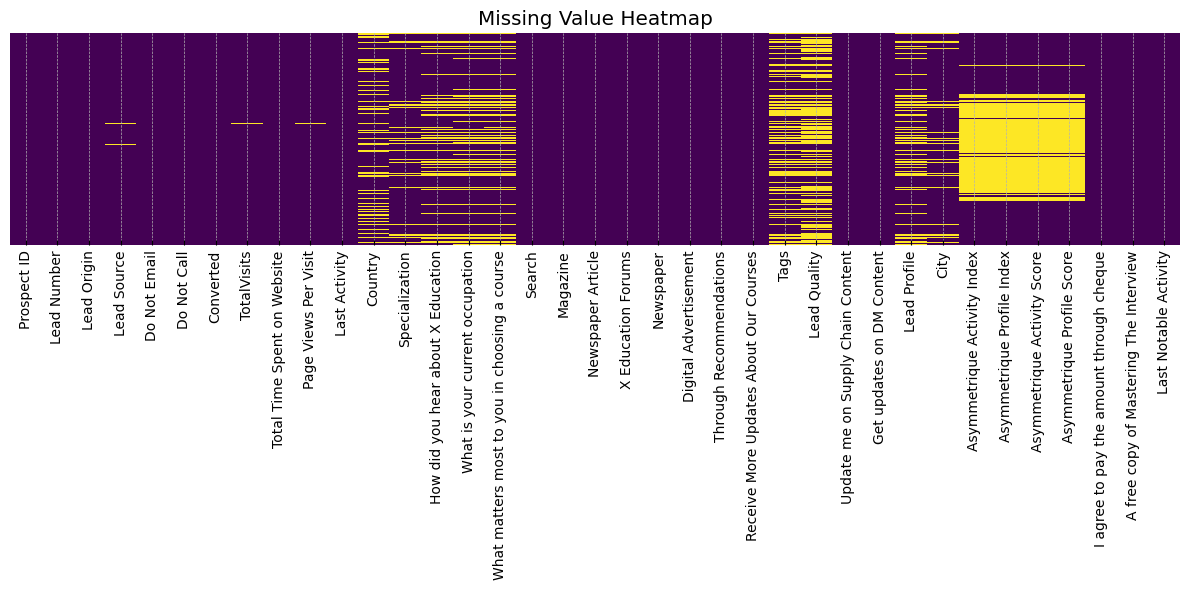

In [12]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# 4. Categorical Variables Analysis

In [14]:
# Analyze categorical variables
cat_columns = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in cat_columns:
    print(f"{col}: {df[col].nunique()}")


Unique values in categorical columns:
Prospect ID: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [16]:
# Analyze numerical variables
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary statistics for numerical columns:")
print(df[num_columns].describe())


Summary statistics for numerical columns:
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min  

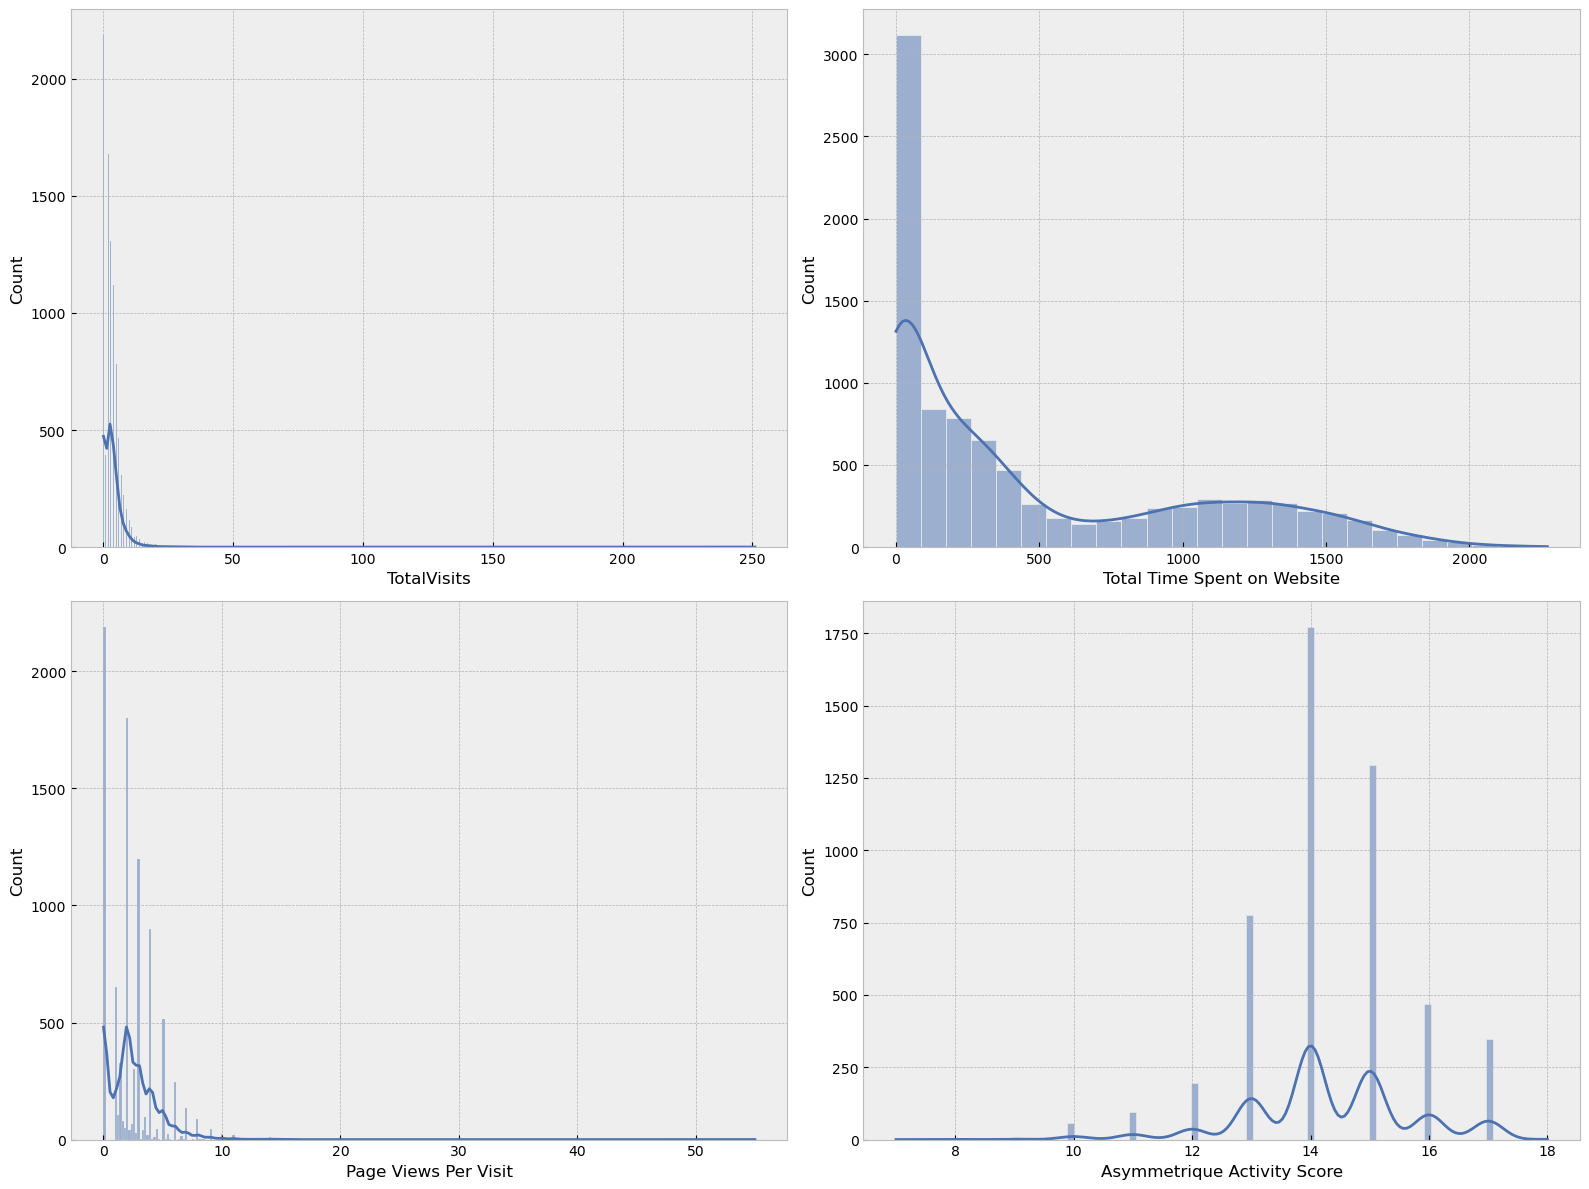

In [17]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(df['TotalVisits'], kde=True, ax=axes[0, 0])
sns.histplot(df['Total Time Spent on Website'], kde=True, ax=axes[0, 1])
sns.histplot(df['Page Views Per Visit'], kde=True, ax=axes[1, 0])
sns.histplot(df['Asymmetrique Activity Score'].dropna(), kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

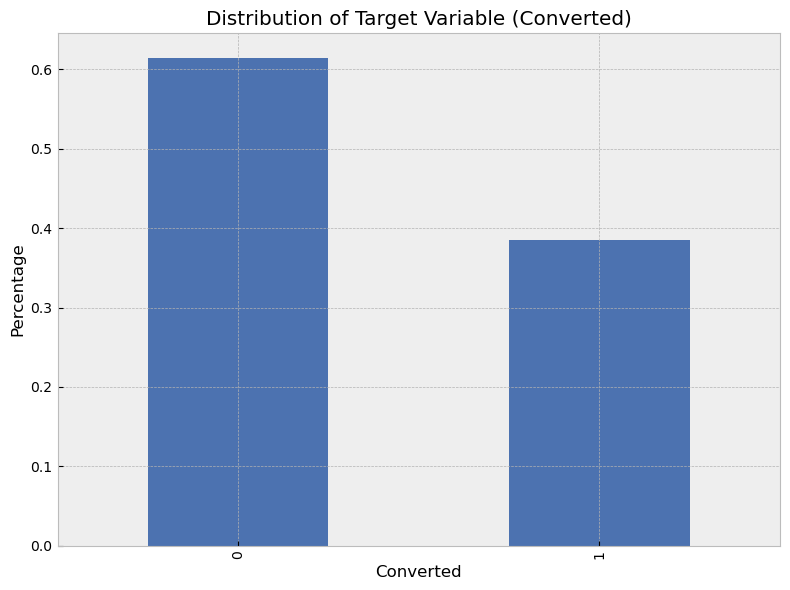

In [15]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df['Converted'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Target Variable (Converted)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()
